In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [3]:
df_main = pd.read_csv('D:\Python\Repository\Python_for_DS\exam\\train.csv')

In [182]:
df_test = pd.read_csv('D:\Python\Repository\Python_for_DS\exam\\test.csv')

In [14]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
df_main.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [8]:
X = df_main.copy()

In [5]:
price = df_main.Price

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [24]:
df_main.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [9]:
def png_export(data, col_list):
    sns.set_style("whitegrid", {'axes.grid': True})
    for col in col_list:
        print(col)
        fg = sns.scatterplot(data=data, x=col, y=data.Price)
        fig = fg.get_figure()
        fig.savefig(f'd:\Python\Repository\Python_for_DS\exam\\{col}.png')
        fig = fg.get_figure().clf()

In [271]:
def png_export_vs(data, col_list1, col_list2, pref):
    sns.set_style("whitegrid", {'axes.grid': True})
    for col1 in col_list1:
        for col2 in col_list2:
#             print(f'{col1} vs {col2}')
            fg = sns.scatterplot(data=data, x=col1, y=col2)
            fig = fg.get_figure()
            fig.savefig(f'd:\Python\Repository\Python_for_DS\exam\\{pref}_{col1}_{col2}.png')
            fig = fg.get_figure().clf()

In [11]:
col_list = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [12]:
col_list2 = ['Square']

In [307]:
png_export(X, col_list)

Id
DistrictId
Rooms
Square
LifeSquare
KitchenSquare
Floor
HouseFloor
HouseYear
Ecology_1
Ecology_2
Ecology_3
Social_1
Social_2
Social_3
Healthcare_1
Helthcare_2
Shops_1
Shops_2


<Figure size 432x288 with 0 Axes>

In [156]:
col_list3 = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Price']

In [272]:
png_export_vs(X, col_list3, col_list3, 'Train')

<Figure size 432x288 with 0 Axes>

### Берем  в проработку
Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor

#### 1. Rooms

In [85]:
X.loc[X.Rooms>9]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [93]:
rooms = X.loc[(X.Square<62) & (X.Square>57)]

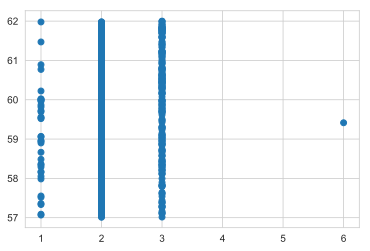

In [118]:
plt.scatter(rooms.Rooms, rooms.Square)

In [102]:
rooms['Rooms'].value_counts()

2.0     615
3.0     209
1.0      37
10.0      2
6.0       1
Name: Rooms, dtype: int64

In [119]:
X.loc[377, 'Rooms']=2
X.loc[8849, 'Rooms']=2

In [121]:
rooms2 = X.loc[X.Square<42]

In [122]:
rooms2['Rooms'].value_counts()

1.0    2367
2.0     209
3.0       7
0.0       3
5.0       1
Name: Rooms, dtype: int64

In [123]:
X.loc[1454, 'Rooms']=1

In [127]:
X.loc[X.Rooms==6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


In [128]:
X.loc[2170, 'Rooms']=3

#### 2. Square

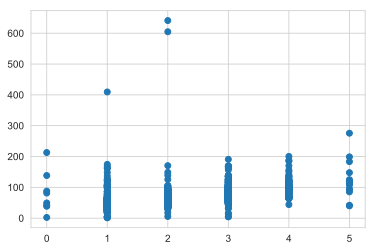

In [131]:
plt.scatter(X.Rooms, X.Square)

In [138]:
X.loc[X.Rooms==1].sort_values(by='Square', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,645.0,6,6,B,367353.574566
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452


In [139]:
square_low = X.loc[X.Price<100000]

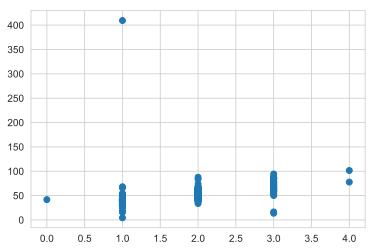

In [142]:
plt.scatter(square_low.Rooms, square_low.Square)

In [159]:
square_low.loc[(square_low.Rooms==1) & (square_low.KitchenSquare>9),'Square'].median()

42.118269105248665

In [160]:
square_low.loc[(square_low.Rooms==1) & (square_low.KitchenSquare>9),'LifeSquare'].median()

23.175863288605935

In [161]:
X.loc[4690, 'Square']=42.11

In [162]:
X.loc[4690, 'LifeSquare']=23.17

In [164]:
X.loc[X.Rooms==2].sort_values(by='Square', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
7084,5376,93,2.0,170.379494,NaN,1.0,3,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,194582.912756
5421,1205,23,2.0,148.671938,100.201652,1.0,1,3.0,2013,0.014073,B,B,2,475,0,NaN,0,0,B,152464.848743
3431,7111,27,2.0,139.070296,89.787666,42.0,5,3.0,2016,0.014073,B,B,2,475,0,NaN,0,0,B,153946.777452


In [165]:
square_low2 = X.loc[X.Price<150000]

In [167]:
square_low2.sort_values(by='Square', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
6910,1170,140,3.0,129.998756,79.621208,11.0,21,22.0,2012,0.238617,B,B,26,3889,6,705.0,3,6,B,132176.743972
132,3428,108,3.0,110.203969,59.270702,12.0,19,28.0,2007,0.019509,B,B,37,7687,11,176.0,5,5,B,146061.730565
1357,14472,66,3.0,104.898559,55.606246,13.0,4,27.0,2014,0.111627,B,B,50,12238,8,1970.0,2,3,B,131970.583639
6740,4802,9,3.0,102.056968,105.272335,10.0,2,17.0,2014,0.161532,B,B,25,5648,1,30.0,2,4,B,136963.323425


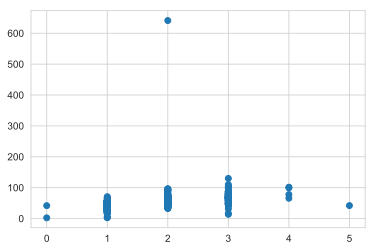

In [168]:
plt.scatter(square_low2.Rooms, square_low2.Square)

In [170]:
square_low2.loc[(square_low2.Rooms==2) & (square_low2.KitchenSquare>9),'Square'].median()

62.94892741233696

In [171]:
square_low2.loc[(square_low2.Rooms==2) & (square_low2.KitchenSquare>9),'LifeSquare'].median()

35.766336735048206

In [172]:
X.loc[6977, 'Square']=62.94

In [173]:
X.loc[6977, 'LifeSquare']=35.76

In [175]:
square_low3 = X.loc[X.Price<200000]

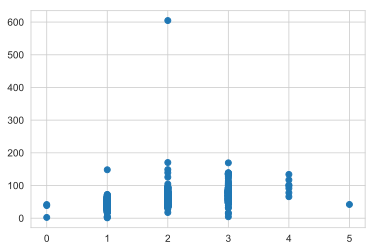

In [176]:
plt.scatter(square_low3.Rooms, square_low3.Square)

In [188]:
square_low3.loc[(square_low3.Rooms==2) & (square_low3.HouseYear<1978), 'Square'].mean()

54.73352819451801

In [189]:
X.loc[4262, 'Square']=54.73

In [195]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.166234,37.074138,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812928,19.150195,85.872429,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.509275,32.772431,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.889736,45.115769,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,275.645284,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [196]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [198]:
X.to_pickle('d:\Python\Repository\Python_for_DS\exam\X_1835.pkl')

In [199]:
X.loc[(X.Price<250000) & (X.Square>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,190949.293998
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,200800.673767
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347
7084,5376,93,2.0,170.379494,NaN,1.0,3,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,194582.912756
8131,4991,93,3.0,167.767027,NaN,1.0,1,1.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,211180.794219
8646,11764,93,3.0,169.117203,NaN,1.0,5,3.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,211325.577641
8913,2603,30,3.0,162.587886,164.526757,0.0,2,3.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207407.352593


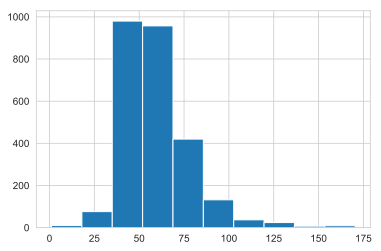

In [204]:
X.loc[(X.HouseYear==1977), 'Square'].hist()

In [214]:
X.loc[(X.Price<250000) & (X.Square>150) & (X.HouseYear==1977) & (X.HouseFloor>1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,190949.293998
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347
7084,5376,93,2.0,170.379494,NaN,1.0,3,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,194582.912756
8646,11764,93,3.0,169.117203,NaN,1.0,5,3.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,211325.577641
8913,2603,30,3.0,162.587886,164.526757,0.0,2,3.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207407.352593


In [216]:
X.loc[(X.Price<250000) & (X.Square<150) & (X.HouseYear==1977) & (X.HouseFloor>1) & (X.Rooms==1), 'Square'].mean()

43.178644929559034

In [217]:
X.loc[(X.Price<250000) & (X.Square<150) & (X.HouseYear==1977) & (X.HouseFloor>1) & (X.Rooms==1), 'LifeSquare'].mean()

30.60857890914192

In [218]:
X.loc[(X.Price<250000) & (X.Square<150) & (X.HouseYear==1977) & (X.HouseFloor>1) & (X.Rooms==1), 'KitchenSquare'].mean()

2.1005988023952096

In [228]:
def mean_calc(df, price, square, house_year, house_floor, rooms):
    square_pr = X.loc[(X.Price<price) & (X.Square<square) & (X.HouseYear==house_year) & (X.HouseFloor>house_floor) & (X.Rooms==rooms), 'Square'].mean()
    life_square_pr = X.loc[(X.Price<price) & (X.Square<square) & (X.HouseYear==house_year) & (X.HouseFloor>house_floor) & (X.Rooms==rooms), 'LifeSquare'].mean()
    kitchen_square_pr = X.loc[(X.Price<price) & (X.Square<square) & (X.HouseYear==house_year) & (X.HouseFloor>house_floor) & (X.Rooms==rooms), 'KitchenSquare'].mean()
    print(f'Average\n Square: {square_pr}\n LifeSquare: {life_square_pr}\n KitchenSquare: {kitchen_square_pr}')

In [251]:
mean_calc(X, 250000, 150, 1958, 1, 1)

Average
 Square: 34.14152469614248
 LifeSquare: 20.255767757644126
 KitchenSquare: 5.666666666666667


In [255]:
X.loc[(X.Price<250000) & (X.Square>150) & (X.HouseYear==1958) & (X.HouseFloor>1)& (X.Rooms==1), 'Square']=34.14

In [259]:
X.loc[(X.Price>250000) & (X.Square>150)].sort_values(by='Price', ascending = False)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,622888.825328
6451,3914,24,4.0,155.930023,76.831293,15.0,6,22.0,2012,0.111627,B,B,50,12238,8,1970.0,2,3,B,559886.965348
6201,10678,17,4.0,170.016872,NaN,0.0,12,0.0,1977,0.093443,B,B,23,4635,5,3300.0,2,4,B,531049.721966
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
5444,14181,62,3.0,156.636577,153.685835,1.0,1,3.0,2005,0.072158,B,B,2,629,1,NaN,0,0,A,502523.573863
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
7201,3233,129,4.0,186.692602,87.487080,32.0,3,3.0,2011,0.020741,B,B,24,5613,5,1340.0,2,5,B,423443.464367
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,645.0,6,6,B,367353.574566
8511,4249,23,5.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,NaN,0,0,B,345665.209100
5087,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,1340.0,2,5,B,340273.238253


In [269]:
X.loc[(X.LifeSquare>700)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [266]:
mean_calc(X, 220000, 80, 2016, 1, 3)

Average
 Square: 67.06308924622425
 LifeSquare: 61.45250428536653
 KitchenSquare: 3.1538461538461537


In [267]:
X.loc[4328, 'LifeSquare']=61.45

In [268]:
X.loc[4328, 'KitchenSquare']=3.1

In [271]:
X.loc[(X.KitchenSquare>700)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [274]:
mean_calc(X, 110000, 33, 1977, 1, 1)

Average
 Square: 30.652097250353375
 LifeSquare: 25.499648616073408
 KitchenSquare: 1.2857142857142858


In [273]:
X.loc[1064, 'KitchenSquare']=35.76

In [275]:
X.loc[8584, 'KitchenSquare']=25.49

In [277]:
X.to_pickle('d:\Python\Repository\Python_for_DS\exam\X_2000.pkl')

In [278]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.074307,36.113858,5.880301,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812928,18.868553,18.573984,5.185390,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.773051,22.767925,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.488511,32.767366,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.877331,45.107755,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,275.645284,461.463614,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [281]:
X.sort_values(by='HouseYear', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
5701,8892,62,1.0,49.298503,51.135512,9.0,9,12.0,2020,0.072158,B,B,2,629,1,NaN,0,0,A,151779.182589
2493,3445,53,1.0,35.672788,21.391266,8.0,4,24.0,2020,0.049637,B,B,34,7759,0,229.0,1,3,B,170847.416766
1499,6731,120,2.0,85.087643,77.976325,10.0,7,10.0,2020,0.341072,B,B,27,5664,48,2300.0,3,11,B,536020.260344


In [282]:
X.loc[1497, 'HouseYear']=2011

In [283]:
X.loc[4189, 'HouseYear']=1968

In [287]:
X.loc[(X.Price>250000) & (X.Square>150)].sort_values(by='Price', ascending = False).to_excel('d:\Python\Repository\Python_for_DS\exam\X_2000.xlsx')

In [288]:
X.loc[X.HouseYear==1977, 'HouseFloor'].max()

117.0

In [292]:
hosuflor = X.loc[X.HouseYear==1977].sort_values(by='HouseFloor', ascending = False)

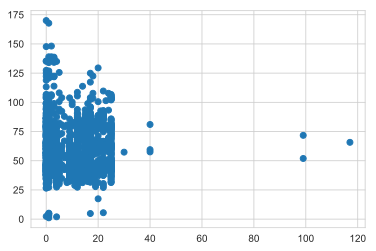

In [295]:
plt.scatter(hosuflor.HouseFloor, hosuflor.Square)

In [297]:
X.loc[X.HouseYear==1977].sort_values(by='HouseFloor', ascending = False).head(7)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8340,15270,31,2.0,81.042938,46.633001,16.0,15,40.0,1977,0.151346,B,A,32,5889,10,830.0,4,1,B,547586.080087
3330,3298,31,1.0,57.551691,21.551876,10.0,32,40.0,1977,0.151346,B,A,32,5889,10,830.0,4,1,B,393799.531732
8357,8016,31,1.0,59.519896,24.050533,10.0,33,40.0,1977,0.151346,B,A,32,5889,10,830.0,4,1,B,389554.063540
5047,2377,34,2.0,57.350700,NaN,10.0,25,30.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,343821.934744


In [299]:
X.loc[8854, 'HouseFloor'] = 8

In [300]:
X.loc[6131, 'HouseFloor'] = 6

In [301]:
X.loc[8599, 'HouseFloor'] = 5

In [302]:
X.loc[6201, 'HouseFloor'] = 12

In [303]:
X.loc[1981, 'Rooms'] = 4

In [304]:
X.loc[3368, 'Rooms'] = 4

In [694]:
X.loc[(X.HouseFloor<X.Floor) & (X.HouseFloor!=0)].sort_values(by='HouseFloor', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,ks_sq


In [15]:
X = pd.read_pickle('d:\Python\Repository\Python_for_DS\exam\X_2332.pkl')

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
ks_sq            10000 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 1.6+ MB


In [18]:
X.loc[(X.Square < 100)&(X.LifeSquare>100), 'LifeSquare'] = X.Square * 0.2

In [19]:
X.loc[(X.Square < 100)&(X.LifeSquare>100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,ks_sq


### Предсказываем цену на LifeSquare

In [27]:
X.loc[X.Square<X.LifeSquare+X.KitchenSquare, 'LifeSquare'] = (X.Square - X.KitchenSquare) * 0.9

In [35]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,ks_sq
count,10000.00000,10000.000000,10000.00000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.88750,56.103492,33.729093,8.205438,8.526700,13.406100,1984.866300,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.153641
std,4859.01902,43.587592,0.81321,18.812413,14.488514,2.848595,5.241148,5.883421,18.412271,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.046931
min,0.00000,0.000000,0.00000,2.596351,0.370619,1.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.050269
25%,4169.50000,20.000000,1.00000,41.773051,22.667187,7.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.115027
50%,8394.50000,36.000000,2.00000,52.488511,31.765635,7.220000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.149927
75%,12592.50000,75.000000,2.00000,65.877331,43.097911,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.189076
max,16798.00000,209.000000,5.00000,275.645284,233.949309,43.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,0.507803


In [46]:
X_ls = X.loc[X.LifeSquare.notna()].take([0, 1, 2, 3, 4, 5, 6, 7 ,8], axis=1)

In [47]:
X_ls.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
0,14038,35,2.0,47.981561,29.442751,6.000000,7,9.0,1969
1,15053,41,3.0,65.683640,40.049543,8.000000,7,9.0,1978
2,4765,53,2.0,44.947953,29.197612,8.989591,8,12.0,1968
3,5809,58,2.0,53.352981,39.917683,9.000000,8,17.0,1977
4,10783,99,1.0,39.649192,23.776169,7.000000,11,12.0,1976


In [55]:
X.to_pickle('d:\Python\Repository\Python_for_DS\exam\X_20190811_1456.pkl')

In [56]:
X_ls_0 = X_ls.drop('LifeSquare', axis=1)

In [61]:
y_ls_0 = pd.DataFrame(X_ls['LifeSquare'], columns=['LifeSquare'])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_ls_0, y_ls_0, test_size=0.3, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor as RF

In [71]:
from sklearn.model_selection import GridSearchCV

In [70]:
params={'min_samples_leaf':[3,5,7,10],
       'n_estimators':[25,50,75,100],
       'max_depth':[3,5,7]}

In [72]:
regr=GridSearchCV(RF(), param_grid=params,cv=2)

In [80]:
%%time
regr.fit(X_train_0, y_train_0)

Wall time: 31.3 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75, 100], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 75}

In [82]:
regr.best_score_

0.7154107430236241

In [83]:
RFR = RF(max_depth=7, min_samples_leaf=3, n_estimators=75, random_state=42)

In [84]:
%%time
RFR.fit(X_ls_0, y_ls_0)

Wall time: 1.25 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
y_pred2 = RFR.predict(X_test_0)

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test_0, y_pred2)

0.7979325503614956

In [89]:
RFR.feature_importances_

array([0.00821743, 0.00945229, 0.05801652, 0.86681469, 0.02732879,
       0.00581581, 0.01209468, 0.0122598 ])

In [90]:
X_ls_f = X.loc[X.LifeSquare.isna()].take([0, 1, 2, 3, 4, 5, 6, 7 ,8], axis=1)

In [92]:
X_ls_f_0 = X_ls_f.drop('LifeSquare', axis=1)

In [97]:
y_pred_ls = RFR.predict(X_ls_f_0)

In [105]:
X_ls_f['LifeSquare'] = y_pred_ls

In [107]:
X.to_pickle('d:\Python\Repository\Python_for_DS\exam\X_20190811_1601.pkl')

In [110]:
X.loc[X.LifeSquare.isna(), 'LifeSquare'] = y_pred_ls

In [114]:
X.to_pickle('d:\Python\Repository\Python_for_DS\exam\X_20190811_1603.pkl')

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
ks_sq            10000 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 1.6+ MB


In [123]:
X.loc[X.Square<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,ks_sq
1608,10202,6,1.0,2.596351,1.436716,1.0,3,25.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,137597.601458,0.385156
3280,10527,27,1.0,4.380726,3.042653,1.0,10,17.0,2013,0.211401,...,B,9,1892,0,NaN,0,1,B,97560.720383,0.228273
4900,4504,27,3.0,4.390331,3.051298,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,NaN,0,1,B,161379.067034,0.227773


### 1-я попытка предсказать цену на Train и Valid

In [124]:
feats=['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
      'Floor', 'HouseFloor', 'HouseYear']

In [158]:
params={'min_samples_leaf':[3,5,7,10,15],
       'n_estimators':[25,50,75,100,125],
       'max_depth':[3,5,7,10]}

In [159]:
X_1 = X.loc[:,feats]

In [160]:
y_1 = pd.DataFrame(X['Price'], columns=['Price'])

In [161]:
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [162]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [163]:
regr_tr=GridSearchCV(RF(), param_grid=params,cv=2)

In [164]:
%%time
regr_tr.fit(X_train_tr, y_train_tr)

Wall time: 1min 16s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10, 15], 'n_estimators': [25, 50, 75, 100, 125], 'max_depth': [3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
regr_tr.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}

In [166]:
regr_tr.best_score_

0.6399666741163488

In [173]:
RFR_tr = RF(max_depth=10, min_samples_leaf=3, n_estimators=50, random_state=42)

In [174]:
%%time
RFR_tr.fit(X_train_tr, y_train_tr)

Wall time: 679 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [175]:
RFR_tr.feature_importances_

array([0.24946248, 0.09202008, 0.45037436, 0.04116036, 0.03564188,
       0.02550472, 0.04733718, 0.05849894])

In [176]:
y_predict_tr = RFR_tr.predict(X_test_tr)

In [177]:
r2_score(y_test_tr, y_predict_tr)

0.6214148662495256

In [178]:
y_predict_vl = RFR_tr.predict(X_valid)

In [180]:
r2_score(y_valid, y_predict_vl)

0.6459002736963732

### Вычищаем Test

In [183]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [184]:
XT = df_test.copy()

In [186]:
col_list4 = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear']

In [383]:
png_export_vs(XT, col_list4, col_list4, 'Test')

<Figure size 432x288 with 0 Axes>

In [195]:
XT.loc[XT['KitchenSquare']>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
40,5428,27,2.0,62.326044,NaN,61.0,12,17.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
1456,5260,73,3.0,69.358242,51.247581,65.0,6,6.0,1931,0.042032,B,B,37,6856,84,1940.0,2,5,B
3816,12612,27,2.0,60.988496,33.646726,60.0,5,17.0,2013,0.072158,B,B,2,629,1,NaN,0,0,A
4281,8015,27,1.0,66.099096,33.639611,62.0,3,7.0,2016,0.014058,B,B,1,290,0,NaN,0,0,B
4405,5199,27,2.0,59.054990,61.647531,57.0,13,12.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B


In [190]:
XT.loc[XT['KitchenSquare']>80, 'KitchenSquare']=XT.Square * 0.2

In [196]:
XT['ks_sq']=XT.KitchenSquare/XT.Square

In [201]:
XT.loc[(XT['ks_sq']>0.5)&(XT['KitchenSquare']>1), 'KitchenSquare']=XT.Square * 0.2

In [202]:
XT.loc[(XT['ks_sq']>0.5)&(XT['KitchenSquare']>1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
2,5480,190,1.0,13.597819,15.948246,2.719564,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,0.882494
40,5428,27,2.0,62.326044,NaN,12.465209,12,17.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,0.978724
1456,5260,73,3.0,69.358242,51.247581,13.871648,6,6.0,1931,0.042032,B,B,37,6856,84,1940.0,2,5,B,0.937163
2424,10662,29,1.0,25.956829,17.251768,5.191366,5,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B,1.271342
3723,4483,62,1.0,41.951462,45.672140,8.390292,13,17.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,0.977320
3816,12612,27,2.0,60.988496,33.646726,12.197699,5,17.0,2013,0.072158,B,B,2,629,1,NaN,0,0,A,0.983792
3863,3194,29,2.0,43.926987,31.028707,8.785397,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B,1.001662
3927,6568,78,1.0,46.827201,40.227011,9.365440,5,32.0,2007,0.219006,B,B,28,6746,3,NaN,1,4,B,0.854204
4281,8015,27,1.0,66.099096,33.639611,13.219819,3,7.0,2016,0.014058,B,B,1,290,0,NaN,0,0,B,0.937986
4405,5199,27,2.0,59.054990,61.647531,11.810998,13,12.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,0.965202


In [203]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1121.pkl')

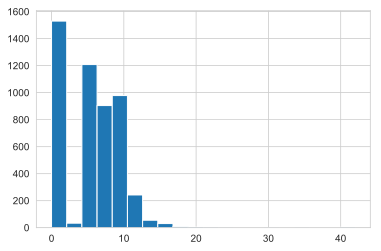

In [217]:
XT['KitchenSquare'].hist(bins=20)

In [220]:
XT.loc[XT['KitchenSquare']<5, 'KitchenSquare']=XT.Square * 0.2

In [221]:
XT.loc[XT['KitchenSquare']<5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
2,5480,190,1.0,13.597819,15.948246,2.719564,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,0.882494
58,2831,21,1.0,21.452899,15.798509,4.290580,11,9.0,1972,0.194489,B,B,47,8004,3,125.0,3,5,B,0.139841
66,9011,53,1.0,1.378543,1.353573,0.275709,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,0.725404
282,5985,66,1.0,24.170511,12.632946,4.834102,10,9.0,1973,0.161976,B,A,31,7010,5,4508.0,3,7,B,0.124118
557,3458,101,1.0,19.043894,13.941145,3.808779,4,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,0.157531
608,16401,30,1.0,2.645046,4.338755,0.529009,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,0.378065
837,2138,27,1.0,5.647458,1.501582,1.129492,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,0.177071
1165,10120,6,1.0,5.100672,3.861780,1.020134,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,0.196053
1195,3969,101,1.0,18.149267,9.698766,3.629853,4,5.0,1967,0.225825,A,B,41,6558,7,1548.0,3,2,B,0.165296
1340,669,7,1.0,23.681687,13.699489,4.736337,4,9.0,1971,0.130618,B,B,39,10418,9,900.0,1,9,B,0.084453


In [222]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1217.pkl')

In [245]:
XT.loc[(XT.Rooms==4)&(XT.HouseYear<1920)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1475,16217,206,4.0,76.428426,50.344903,11.0,7,6.0,1912,0.042032,B,B,37,6856,84,1940.0,2,5,B,0.143926


In [247]:
XT.loc[1475, 'Rooms'] = 3

In [243]:
XT.loc[3253, 'HouseYear'] = 1980

In [253]:
XT.loc[(XT.HouseYear==1977)&(XT.Square>100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
78,6553,34,5.0,122.375273,0.333490,24.475055,9,0.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,0.000000
153,1105,9,3.0,105.351051,5.589869,21.070210,11,1.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,0.009492
479,2168,23,3.0,104.992274,NaN,20.998455,23,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,0.009525
516,12094,23,3.0,104.359532,NaN,20.871906,5,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,0.009582
774,11584,23,3.0,102.491749,NaN,20.498350,26,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,0.009757
1027,826,127,3.0,101.876767,70.744266,11.000000,8,9.0,1977,0.486246,B,B,13,2514,19,NaN,0,6,B,0.107974
1284,52,1,3.0,108.652615,1.694469,21.730523,10,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,0.009204
1545,13954,23,3.0,105.038952,NaN,21.007790,5,25.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,0.009520
1753,15352,23,3.0,102.223040,99.538614,20.444608,9,0.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,0.000000
1822,11147,27,4.0,136.233667,NaN,27.246733,5,3.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,0.007340


In [255]:
XT.loc[(XT.Rooms==1)&(XT.Square>110), 'Rooms']=5

In [257]:
XT.loc[(XT.Rooms==2)&(XT.Square>110)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1447,1968,27,2.0,138.039182,92.484098,42.0,3,3.0,2016,0.014073,B,B,2,475,0,NaN,0,0,B,0.304261
3328,14341,27,2.0,115.553129,118.355254,12.0,5,6.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,0.103848


In [258]:
XT.loc[(XT.Rooms==2)&(XT.Square>110), 'Rooms']=5

In [259]:
XT.loc[(XT.Rooms==3)&(XT.Square>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1264,13589,27,3.0,173.974480,76.289475,9.000000,3,3.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B,0.051732
2039,3357,27,3.0,170.476326,75.973612,8.000000,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B,0.046927
3909,1397,76,3.0,221.138768,118.055342,44.227754,32,48.0,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B,0.018088


In [260]:
XT.loc[3909, 'Rooms']=6

In [261]:
XT.loc[(XT.Rooms==3)&(XT.Square>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1264,13589,27,3.0,173.974480,76.289475,9.0,3,3.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B,0.051732
2039,3357,27,3.0,170.476326,75.973612,8.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B,0.046927


In [262]:
XT.loc[(XT.Rooms==3)&(XT.Square>150), 'Rooms']=5

In [263]:
XT.loc[(XT.Rooms==4)&(XT.Square>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1499,7769,124,4.0,189.679576,114.708673,37.935915,19,40.0,2013,0.174739,B,B,17,3379,9,100.0,0,3,B,0.021088
2557,16053,17,4.0,168.729035,169.901701,33.745807,4,0.0,2013,0.093443,B,B,23,4635,5,3300.0,2,4,B,0.000000


In [264]:
XT.loc[(XT.Rooms==4)&(XT.Square>150), 'Rooms']=5

In [269]:
XT.loc[XT.HouseFloor>40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
1587,5707,76,2.0,73.363523,38.740060,5.000000,38,48.0,2010,0.0,B,B,7,1660,39,1786.0,1,5,B,0.068154
3711,414,76,2.0,67.609808,41.175948,5.000000,46,48.0,2002,0.0,B,B,7,1660,39,1786.0,1,5,B,0.073954
3909,1397,76,6.0,221.138768,118.055342,44.227754,32,48.0,2011,0.0,B,B,7,1660,39,1786.0,1,5,B,0.018088


In [268]:
XT.loc[651, 'HouseFloor']=18

In [274]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1427.pkl')

In [276]:
XT.loc[(XT.Floor>30)&(XT.HouseFloor<25)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
4698,15759,17,2.0,57.60187,37.744743,10.0,78,22.0,1989,0.0,B,B,25,5027,4,46.0,1,1,B,0.173605


In [277]:
XT.loc[4698, 'Floor']=22

In [291]:
XT.loc[(XT.Floor>XT.HouseFloor)&(XT.HouseFloor<2)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq


In [283]:
XT.loc[(XT.Floor>XT.HouseFloor)&(XT.HouseFloor<2), 'HouseFloor']=XT.Floor

In [290]:
XT.loc[(XT.Floor>XT.HouseFloor)].sort_values(by='HouseYear', ascending = False).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq


In [287]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1440.pkl')

In [288]:
XT.loc[(XT.Floor>XT.HouseFloor), 'HouseFloor']=XT.Floor

In [295]:
XT.loc[XT.Square<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
66,9011,53,1.0,1.378543,1.353573,0.275709,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,0.725404
608,16401,30,1.0,2.645046,4.338755,0.529009,2,2.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,0.378065
837,2138,27,1.0,5.647458,1.501582,1.129492,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,0.177071
1165,10120,6,1.0,5.100672,3.861780,1.020134,3,3.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,0.196053
4490,1165,27,1.0,2.372101,1.899119,0.474420,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,0.421567
4540,7855,6,1.0,4.967143,2.968086,0.993429,3,3.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B,0.201323
4713,170,6,2.0,2.900586,61.468563,0.580117,18,18.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,0.344758
4902,1420,45,1.0,1.975769,2.900371,0.395154,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,0.506132


In [303]:
XT.loc[(XT.LifeSquare.notna())&(XT.Square-XT.KitchenSquare<XT.LifeSquare), 'LifeSquare']=(XT.Square-XT.KitchenSquare)*0.9

In [305]:
XT.loc[(XT.LifeSquare.notna())&((XT.Square-XT.KitchenSquare)*0.9<XT.LifeSquare)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
58,2831,21,1.0,21.452899,15.798509,4.290580,11,11.0,1972,0.194489,B,B,47,8004,3,125.0,3,5,B,0.139841
90,6632,24,2.0,44.371997,35.515236,5.000000,4,5.0,1964,0.111627,B,B,50,12238,8,1970.0,2,3,B,0.112684
446,12644,1,2.0,62.138622,51.313746,10.000000,17,17.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,0.160931
557,3458,101,1.0,19.043894,13.941145,3.808779,4,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,0.157531
708,11859,2,1.0,30.411311,22.933600,6.082262,7,7.0,1962,0.000000,B,B,33,7425,1,NaN,2,5,B,0.131530
803,3747,23,5.0,139.045763,89.790274,42.000000,1,3.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B,0.302059
870,13736,27,5.0,141.540215,91.704806,42.000000,3,3.0,2013,0.014073,B,B,2,475,0,NaN,0,0,B,0.296735
1158,13079,79,1.0,35.091915,23.645244,9.000000,5,12.0,1968,0.307467,B,A,30,5048,9,325.0,2,5,B,0.256469
1165,10120,6,1.0,5.100672,3.861780,1.020134,3,3.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,0.196053
1241,8009,151,3.0,58.077379,48.303844,6.000000,10,10.0,1975,0.236108,B,B,16,3893,27,NaN,3,10,B,0.103310


In [306]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1457.pkl')

#### Предсказываем LifeSquare на тестовой выборке

In [309]:
XT_ls = XT.loc[XT.LifeSquare.notna()].take([0, 1, 2, 3, 4, 5, 6, 7 ,8], axis=1)

In [311]:
XT_ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4997
Data columns (total 9 columns):
Id               3959 non-null int64
DistrictId       3959 non-null int64
Rooms            3959 non-null float64
Square           3959 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    3959 non-null float64
Floor            3959 non-null int64
HouseFloor       3959 non-null float64
HouseYear        3959 non-null int64
dtypes: float64(5), int64(4)
memory usage: 309.3 KB


In [313]:
XT_ls_0 = XT_ls.drop('LifeSquare', axis=1)
yT_ls_0 = pd.DataFrame(XT_ls['LifeSquare'], columns=['LifeSquare'])
XT_train_0, XT_test_0, yT_train_0, yT_test_0 = train_test_split(XT_ls_0, yT_ls_0, test_size=0.3, random_state=42)
params_T={'min_samples_leaf':[3,5,7,10],
       'n_estimators':[25,50,75,100],
       'max_depth':[3,5,7]}
regr_T_ls=GridSearchCV(RF(), param_grid=params_T,cv=2)

In [314]:
%%time
regr_T_ls.fit(XT_train_0, yT_train_0)

Wall time: 18.8 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75, 100], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [315]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 75}

In [316]:
regr.best_score_

0.7154107430236241

In [318]:
RFR_T_ls = RF(max_depth=7, min_samples_leaf=3, n_estimators=75, random_state=42)

In [319]:
%%time
RFR_T_ls.fit(XT_train_0, yT_train_0)

Wall time: 484 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [320]:
yT_pred = RFR_T_ls.predict(XT_test_0)

In [321]:
r2_score(yT_test_0, yT_pred)

0.6341246513332661

In [322]:
RFR_T_ls.feature_importances_

array([0.01365084, 0.01056233, 0.09504936, 0.78278158, 0.05023221,
       0.01028592, 0.0119084 , 0.02552936])

In [323]:
XT_ls_f = XT.loc[XT.LifeSquare.isna()].take([0, 1, 2, 3, 4, 5, 6, 7 ,8], axis=1)

In [326]:
XT_ls_f_0 = XT_ls_f.drop('LifeSquare', axis=1)

In [328]:
yT_pred_ls = RFR_T_ls.predict(XT_ls_f_0)

In [330]:
yT_pred_ls

array([27.78754216, 22.2637403 , 45.08038859, ..., 40.1093113 ,
       41.62694157, 37.12723202])

In [331]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1551.pkl')

In [332]:
XT.loc[XT.LifeSquare.isna(), 'LifeSquare'] = yT_pred_ls

In [333]:
XT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
ks_sq            5000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 781.3+ KB


In [337]:
XT.loc[(XT.Square-XT.KitchenSquare)<XT.LifeSquare]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq


In [340]:
XT.loc[((XT.Square-XT.KitchenSquare)*0.9<XT.LifeSquare)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
58,2831,21,1.0,21.452899,15.798509,4.290580,11,11.0,1972,0.194489,B,B,47,8004,3,125.0,3,5,B,0.139841
90,6632,24,2.0,44.371997,35.515236,5.000000,4,5.0,1964,0.111627,B,B,50,12238,8,1970.0,2,3,B,0.112684
446,12644,1,2.0,62.138622,51.313746,10.000000,17,17.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,0.160931
557,3458,101,1.0,19.043894,13.941145,3.808779,4,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,0.157531
675,15918,30,1.0,32.066235,23.301690,6.413247,5,17.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,0.031185


In [7]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190813_1553.pkl')

NameError: name 'XT' is not defined

In [341]:
yT_pred2 = RFR.predict(XT_test_0)

In [342]:
r2_score(yT_test_0, yT_pred2)

0.6416090593533694

In [346]:
XT.loc[(XT.LifeSquare>80)&(XT.KitchenSquare>40)&(XT.Square<150), 'KitchenSquare']

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ks_sq
803,3747,23,5.0,139.045763,89.790274,42.0,1,3.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B,0.302059
870,13736,27,5.0,141.540215,91.704806,42.0,3,3.0,2013,0.014073,B,B,2,475,0,NaN,0,0,B,0.296735
1447,1968,27,5.0,138.039182,92.484098,42.0,3,3.0,2016,0.014073,B,B,2,475,0,NaN,0,0,B,0.304261


In [350]:
XT.loc[803, 'KitchenSquare'] = 27.8

In [360]:
XT.loc[870, 'KitchenSquare'] = 28.2

In [352]:
XT.loc[1447, 'KitchenSquare'] = 27.6

In [356]:
XT.loc[803, 'LifeSquare'] = (139-27.8)*0.9

In [378]:
XT.loc[870, 'LifeSquare'] = (141-28.2)*0.9

In [381]:
XT.loc[1447, 'LifeSquare'] = (138-27.6)*0.9

In [382]:
XT.loc[1447]

Id                   1968
DistrictId             27
Rooms                   5
Square            138.039
LifeSquare          99.36
KitchenSquare        27.6
Floor                   3
HouseFloor              3
HouseYear            2016
Ecology_1        0.014073
Ecology_2               B
Ecology_3               B
Social_1                2
Social_2              475
Social_3                0
Healthcare_1          NaN
Helthcare_2             0
Shops_1                 0
Shops_2                 B
ks_sq            0.304261
Name: 1447, dtype: object

In [384]:
XT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null object
ks_sq            5000 non-null float64
dtypes: float64(17), object(3)
memory usage: 980.3+ KB


In [2]:
XT_f = XT.take([1, 2, 3, 4, 5, 6, 7 ,8], axis=1)

NameError: name 'XT' is not defined

In [390]:
XT_f.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
0,58.0,2.0,49.882643,33.432782,6.000000,6.0,14.0,1972.0
1,74.0,2.0,69.263183,27.787542,13.852637,6.0,6.0,1977.0
2,190.0,1.0,13.597819,9.790429,2.719564,2.0,5.0,1909.0
3,47.0,2.0,73.046609,51.940842,9.000000,22.0,22.0,2007.0
4,27.0,1.0,47.527111,34.219520,9.505422,17.0,17.0,2017.0


In [391]:
y_predict_final = RFR_tr.predict(XT_f)

In [393]:
XT['Price']=y_predict_final

In [396]:
XT.to_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190814_2153.pkl')

In [9]:
XTF=pd.read_pickle('d:\Python\Repository\Python_for_DS\exam\XT_20190814_2153.pkl')

In [11]:
XTF.to_csv('d:\Python\Repository\Python_for_DS\exam\APatrin_predictions.csv', columns=['Id', 'Price'], index=False)